# Debut of Quantitative Research

In [1]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

## Package: ffn
* Official document: https://pmorissette.github.io/ffn/

In [ ]:
!pip install --upgrade pandas-datareader
!pip install ffn

### Example 1: Fetching Daily Price of Single Asset

#### Data Access

In [3]:
import ffn

tbl = ffn.get("2330.tw", start = "2006-01-01")

#### Plot

<AxesSubplot:xlabel='Date'>

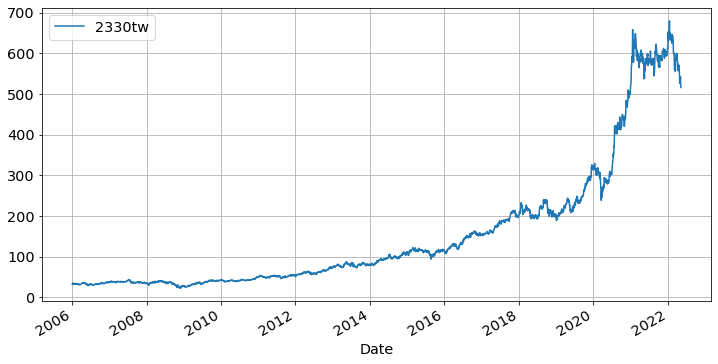

In [4]:
%matplotlib inline

tbl.plot.line(grid = True, figsize = (12, 6))

#### Plot After Rebasing

<AxesSubplot:xlabel='Date'>

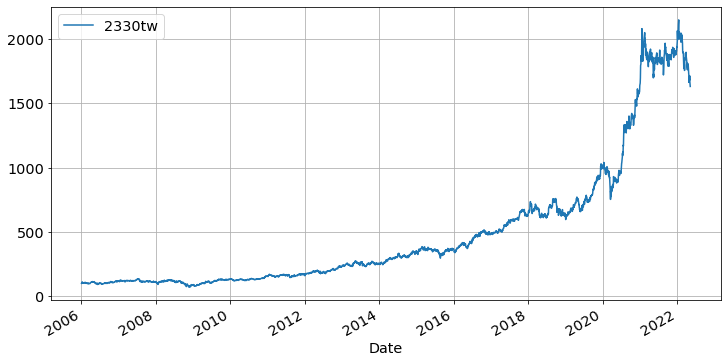

In [5]:
tbl.rebase().plot.line(grid = True, figsize = (12, 6))

#### Calculation of Return Rate: pct_change()

<AxesSubplot:xlabel='Date'>

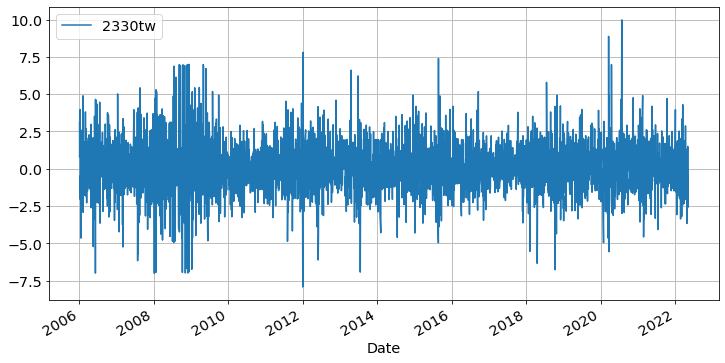

In [6]:
return_rates = tbl.pct_change() * 100
return_rates.plot.line(grid = True, figsize = (12, 6))

<AxesSubplot:ylabel='Frequency'>

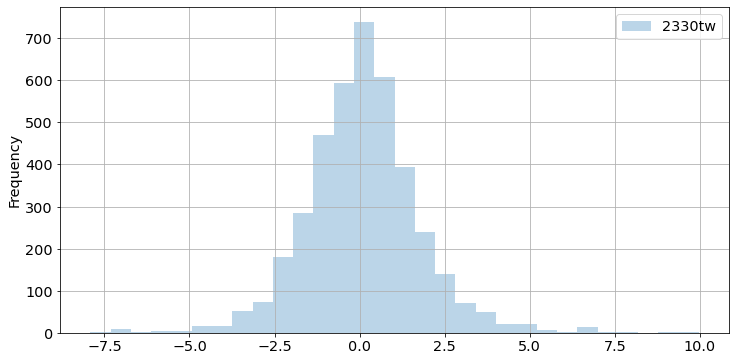

In [7]:
return_rates.plot.hist(bins = 30, alpha = 0.3, grid = True, figsize = (12, 6))

#### Statistics Summary

In [8]:
tbl.calc_stats().display()

Stat                 2330tw
-------------------  ----------
Start                2006-01-02
End                  2022-05-10
Risk-free rate       0.00%

Total Return         1529.90%
Daily Sharpe         0.79
Daily Sortino        1.37
CAGR                 18.61%
Max Drawdown         -46.53%
Calmar Ratio         0.40

MTD                  -4.09%
3m                   -20.10%
6m                   -14.88%
YTD                  -15.68%
1Y                   -10.78%
3Y (ann.)            30.50%
5Y (ann.)            24.29%
10Y (ann.)           23.65%
Since Incep. (ann.)  18.61%

Daily Sharpe         0.79
Daily Sortino        1.37
Daily Mean (ann.)    21.06%
Daily Vol (ann.)     26.61%
Daily Skew           0.17
Daily Kurt           2.63
Best Day             9.97%
Worst Day            -7.92%

Monthly Sharpe       0.90
Monthly Sortino      1.89
Monthly Mean (ann.)  19.11%
Monthly Vol (ann.)   21.12%
Monthly Skew         0.74
Monthly Kurt         4.47
Best Month           35.94%
Worst Month          

### Example 2: International Market

In [9]:
tbl2 = ffn.get("^TWII, ^N225, ^GSPC, ^GDAXI, ^HSI", start = "2006-01-01")

<AxesSubplot:xlabel='Date'>

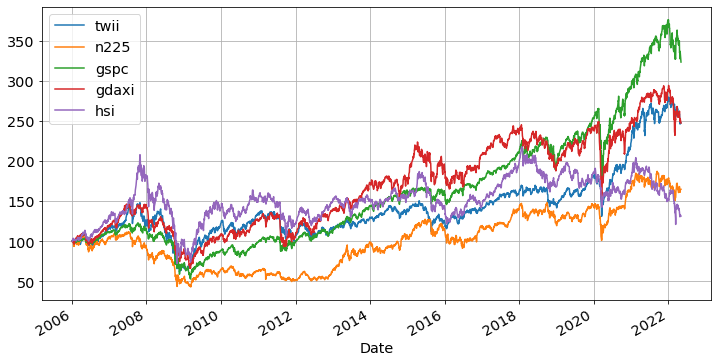

In [10]:
tbl2.rebase().plot(grid = True, figsize = (12, 6))

In [11]:
tbl2.calc_stats().display()

Stat                 twii        n225        gspc        gdaxi       hsi
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2006-01-04  2006-01-04  2006-01-04  2006-01-04  2006-01-04
End                  2022-05-06  2022-05-06  2022-05-06  2022-05-06  2022-05-06
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         147.99%     65.04%      223.79%     147.56%     31.59%
Daily Sharpe         0.43        0.27        0.50        0.40        0.20
Daily Sortino        0.66        0.42        0.77        0.62        0.33
CAGR                 5.72%       3.11%       7.46%       5.71%       1.69%
Max Drawdown         -58.31%     -61.37%     -56.78%     -54.70%     -65.18%
Calmar Ratio         0.10        0.05        0.13        0.10        0.03

MTD                  -0.07%      0.58%       -3.83%      -2.19%      -1.35%
3m                   -7.16%      -0.03%      -5.21%      -11.55%     -17.65%
6m     

#### Correlation

In [12]:
tbl2.pct_change().corr()

,twii,n225,gspc,gdaxi,hsi
twii,1.000000,0.597221,0.231593,0.356659,0.650503
n225,0.597221,1.000000,0.227063,0.387649,0.613037
gspc,0.231593,0.227063,1.000000,0.636508,0.294632
gdaxi,0.356659,0.387649,0.636508,1.000000,0.424536
hsi,0.650503,0.613037,0.294632,0.424536,1.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

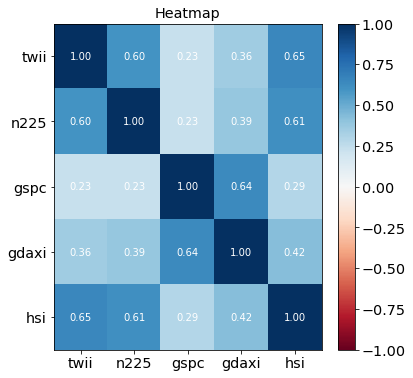

In [13]:
tbl2.pct_change().plot_corr_heatmap(figsize = (6, 6))

### Example 3: Signal Generation & Backtesting

In [14]:
from ffn.utils import clean_ticker

target = "2330.tw"
name = clean_ticker(target)
asset = ffn.get(target, start = "2020-01-01")

asset

,2330tw
Date,
2020-01-02,322.369720
2020-01-03,322.845245
2020-01-06,315.713165
2020-01-07,313.335815
2020-01-08,313.335815
...,...
2022-05-04,534.000000
2022-05-05,542.000000
2022-05-06,528.000000


#### Signal Generation

In [15]:
asset["SMA5"] = asset[name].rolling(5).mean()
asset["SMA10"] = asset[name].rolling(10).mean()

asset

,2330tw,SMA5,SMA10
Date,,,
2020-01-02,322.369720,NaN,NaN
2020-01-03,322.845245,NaN,NaN
2020-01-06,315.713165,NaN,NaN
2020-01-07,313.335815,NaN,NaN
2020-01-08,313.335815,317.519952,NaN
...,...,...,...
2022-05-04,534.000000,532.000000,544.6
2022-05-05,542.000000,535.200000,541.8
2022-05-06,528.000000,534.600000,538.1


In [16]:
buy_signal_mask = (asset["SMA5"].shift(2) < asset["SMA10"].shift(2)) & (asset["SMA5"].shift(1) > asset["SMA10"].shift(1))
buy_signal_mask

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2022-05-04    False
2022-05-05    False
2022-05-06    False
2022-05-09    False
2022-05-10    False
Length: 569, dtype: bool

In [17]:
sell_signal_mask = (asset["SMA5"].shift(2) > asset["SMA10"].shift(2)) & (asset["SMA5"].shift(1) < asset["SMA10"].shift(1))

#### Plot

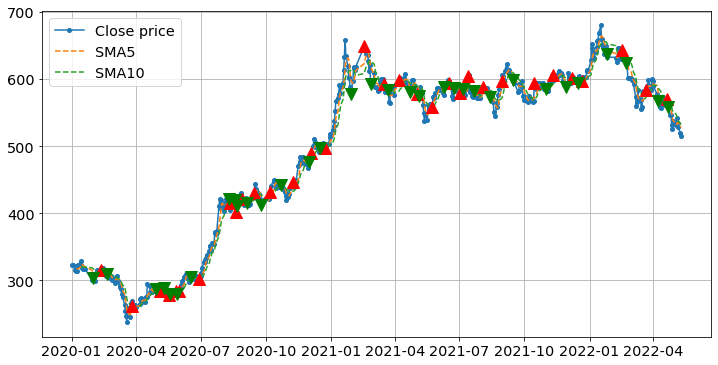

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.plot(asset[name], ".-", markersize = 8)
plt.plot(asset["SMA5"], linestyle = "--")
plt.plot(asset["SMA10"], linestyle = "--")
plt.plot(asset[name][buy_signal_mask], "r^", markersize = 12)
plt.plot(asset[name][sell_signal_mask], "gv", markersize = 12)
plt.grid(True)
plt.legend(["Close price", "SMA5", "SMA10"])

#### Backtesting: Buy Only

In [19]:
position = False
asset["PV"] = 0.0
turnovers = 0

for i, t in enumerate(asset.index):
    
    if not position:
        
        payoff = 0
        asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
        
        if buy_signal_mask[t]:
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a long position.")
    else:
        
        payoff = asset[name].iloc[i] - asset[name].iloc[i - 1]
        asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
       
        if sell_signal_mask[t]:
            position = False
            print("<" * 5, "Close a long position.")
            print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))

print("Number of turnovers:", turnovers)

>>>>> Create a long position.
<<<<< Close a long position.
2020-02-20 00:00:00 -> 309.53 -> -5.71
>>>>> Create a long position.
<<<<< Close a long position.
2020-04-29 00:00:00 -> 287.09 -> 19.26
>>>>> Create a long position.
<<<<< Close a long position.
2020-05-11 00:00:00 -> 289.01 -> 24.54
>>>>> Create a long position.
<<<<< Close a long position.
2020-05-19 00:00:00 -> 279.89 -> 25.98
>>>>> Create a long position.
<<<<< Close a long position.
2020-05-29 00:00:00 -> 280.37 -> 21.66
>>>>> Create a long position.
<<<<< Close a long position.
2020-06-18 00:00:00 -> 304.39 -> 42.32
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-10 00:00:00 -> 421.50 -> 161.85
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-18 00:00:00 -> 419.08 -> 165.72
>>>>> Create a long position.
<<<<< Close a long position.
2020-08-21 00:00:00 -> 410.86 -> 174.91
>>>>> Create a long position.
<<<<< Close a long position.
2020-09-04 00:00:00 -> 415.21 -> 169.11
>>>>> Create a l

#### Performance Report

##### Max Drawdown (MDD)
- https://en.wikipedia.org/wiki/Drawdown_(economics)

In [20]:
asset["MDD (Ours)"] = (asset["PV"] - asset["PV"].cummax()).cummin()
dd_idx = asset["MDD (Ours)"].idxmin()
asset["Buy&Hold"] = asset[name].diff().cumsum()
asset["MDD (Buy&Hold)"] = (asset["Buy&Hold"] - asset["Buy&Hold"].cummax()).cummin()
dd_idx2 = asset["MDD (Buy&Hold)"].idxmin()

##### Benchmark

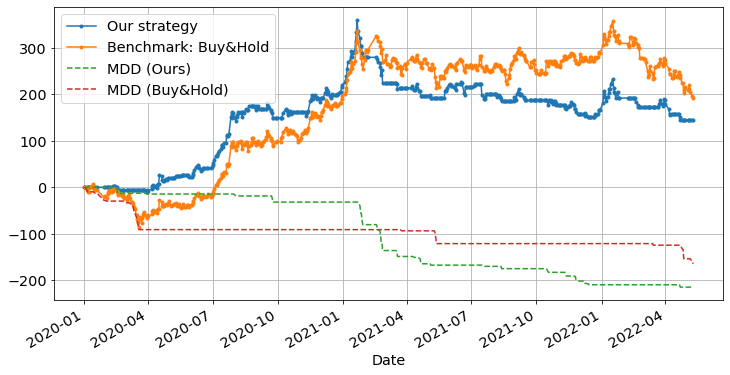

In [21]:
asset[["PV", "Buy&Hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = asset["MDD (Ours)"].plot(style = "--", grid = True)
ax = asset["MDD (Buy&Hold)"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: Buy&Hold", "MDD (Ours)", "MDD (Buy&Hold)"])

### Example 4: Extension to Example 3
* Modify Example 3 so that the program can allow short positions.

In [22]:
position = False
asset["PV"] = 0.0
turnovers = 0

for i, t in enumerate(asset.index):
    
    if not position:
        
        payoff = 0
        
        if buy_signal_mask[t]:
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a long position.")
            
        if sell_signal_mask[t]:
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a short position.")
    else:
        
        payoff = asset[name].iloc[i] - asset[name].iloc[i - 1]
       
        if sell_signal_mask[t]:
            position = False
            print("<" * 5, "Close a long position.")
            
        if buy_signal_mask[t]:
            position = False
            payoff = -payoff
            print("<" * 5, "Close a short position.")
            
            
    asset["PV"].iloc[i] = asset["PV"].iloc[i - 1] + payoff
    print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))

print("Number of turnovers", turnovers)

2020-01-02 00:00:00 -> 322.37 -> 0.00
2020-01-03 00:00:00 -> 322.85 -> 0.00
2020-01-06 00:00:00 -> 315.71 -> 0.00
2020-01-07 00:00:00 -> 313.34 -> 0.00
2020-01-08 00:00:00 -> 313.34 -> 0.00
2020-01-09 00:00:00 -> 320.94 -> 0.00
2020-01-10 00:00:00 -> 322.85 -> 0.00
2020-01-13 00:00:00 -> 324.75 -> 0.00
2020-01-14 00:00:00 -> 329.03 -> 0.00
2020-01-15 00:00:00 -> 323.32 -> 0.00
2020-01-16 00:00:00 -> 318.09 -> 0.00
2020-01-17 00:00:00 -> 316.66 -> 0.00
2020-01-20 00:00:00 -> 316.66 -> 0.00
2020-01-30 00:00:00 -> 300.97 -> 0.00
>>>>> Create a short position.
2020-01-31 00:00:00 -> 304.30 -> 0.00
2020-02-03 00:00:00 -> 299.55 -> -4.75
2020-02-04 00:00:00 -> 309.06 -> 4.75
2020-02-05 00:00:00 -> 311.43 -> 7.13
2020-02-06 00:00:00 -> 316.19 -> 11.89
2020-02-07 00:00:00 -> 311.91 -> 7.61
2020-02-10 00:00:00 -> 311.43 -> 7.13
<<<<< Close a short position.
2020-02-11 00:00:00 -> 315.24 -> 3.33
2020-02-12 00:00:00 -> 318.57 -> 3.33
2020-02-13 00:00:00 -> 318.57 -> 3.33
2020-02-14 00:00:00 -> 31

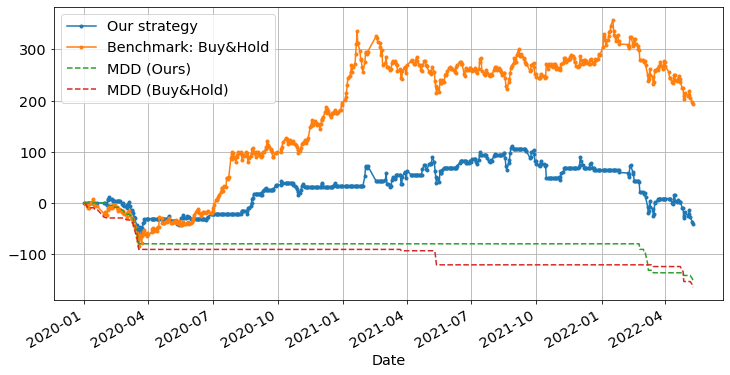

In [23]:
asset["MDD (Ours)"] = (asset["PV"] - asset["PV"].cummax()).cummin()
dd_idx = asset["MDD (Ours)"].idxmin()
asset["Buy&Hold"] = asset[name].diff().cumsum()
asset["MDD (Buy&Hold)"] = (asset["Buy&Hold"] - asset["Buy&Hold"].cummax()).cummin()
dd_idx2 = asset["MDD (Buy&Hold)"].idxmin()
asset[["PV", "Buy&Hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = asset["MDD (Ours)"].plot(style = "--", grid = True)
ax = asset["MDD (Buy&Hold)"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: Buy&Hold", "MDD (Ours)", "MDD (Buy&Hold)"])

### What You Can Do
* Change the target asset: https://www.tej.com.tw/webtej/doc/uid.htm
* Modify the program so that it could be used for mulit-asset strategies.